# Walmart Demand Forecasting
### Patricio Hernandez Senosiain
---

## Contents

> [1 - Introduction](#1---Introduction)
> 
> [2 - Importing dependencies](#2---Importing-dependencies)
> 
> [3 - Data retrieval and exploratory analysis](#3---Data-retrieval-and-exploratory-analysis)
> 
> [4 - Data cleaning and preprocessing](#4---Data-cleaning-and-preprocessing)
> 
> [5 - Modelling](#5---Modelling)
> 
> [6 - Final predictions and submission](#6---Final-predictions-and-submission)


## 1 - Introduction

## 2 - Importing dependencies

In [1]:
# Importing libraries and modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Declaring standard Seaborn color palette
standard_palette = []
for i in range(10):
    standard_palette += list(sns.color_palette('muted')) 
    

## 3 - Data retrieval and exploratory analysis


> [3.1 - Data retrieval](#3.1---Data-retrieval)
> 
> [3.2 - General overview](#3.2---General-overview)
> 
> [3.3 - Distribution of target variable](#3.3---Distribution-of-target-variable)
> 
> [3.4 - Distribution of features](#3.4---Distribution-of-features)
>
> [3.5 - Bivariate analysis of numerical features](#3.5---Bivariate-analysis-of-numerical-features)
> 
> [3.6 - Correlation between features](#3.6---Correlation-between-features)
> 
> [3.7 - Overview of missing values](#3.7---Overview-of-missing-values)
> 

### 3.1 - Data retrieval

In [2]:
# Retrieving datasets
stores = pd.read_csv('data/stores.csv')
features = pd.read_csv('data/features.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### 3.2 - General overview

In [3]:
stores.info()
print('-'*30)
features.info()
print('-'*30)
train.info()
print('-'*30)
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemploym

In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
features.head() 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
# Concatenating train and test datasets
data = pd.concat([train,test])
data['Test'] = data['Weekly_Sales'].isnull()

# Merging with feature and store data
data = data.merge(stores, how='left', on='Store' )
data = data.merge(features, how='left', on=['Store', 'Date'])

# Light cleaning to remove duplicate column and negative sales
data = data[data['Weekly_Sales']>=0]
data = data.drop('IsHoliday_y', axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday_x   420285 non-null  bool   
 5   Test          420285 non-null  bool   
 6   Type          420285 non-null  object 
 7   Size          420285 non-null  int64  
 8   Temperature   420285 non-null  float64
 9   Fuel_Price    420285 non-null  float64
 10  MarkDown1     150200 non-null  float64
 11  MarkDown2     110918 non-null  float64
 12  MarkDown3     136667 non-null  float64
 13  MarkDown4     134535 non-null  float64
 14  MarkDown5     150948 non-null  float64
 15  CPI           420285 non-null  float64
 16  Unemployment  420285 non-null  float64
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [9]:
data.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Test,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,False,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [10]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Test,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
421565,45,98,2012-09-28,508.37,False,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,2012-10-26,1076.80,False,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


### 3.4 - Distribution of target variable

In [11]:
# Computing weekly depratmental sales summary stats
data['Weekly_Sales'].describe()

count    420285.000000
mean      16030.329773
std       22728.500149
min           0.000000
25%        2117.560000
50%        7659.090000
75%       20268.380000
max      693099.360000
Name: Weekly_Sales, dtype: float64

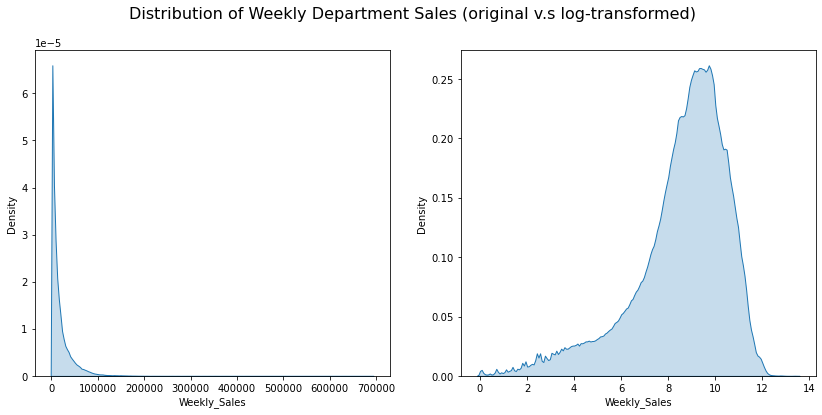

In [12]:
# Plotting weekly depratmental sales distribution
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14, 6)
sns.kdeplot(data['Weekly_Sales'], palette='crest', fill=True, bw_adjust=.3, ax=ax1) 
sns.kdeplot(np.log1p(data['Weekly_Sales']), palette='flare', fill=True, bw_adjust=.3, ax=ax2) 
fig.suptitle('Distribution of Weekly Department Sales (original v.s log-transformed)', size=16)
plt.show()

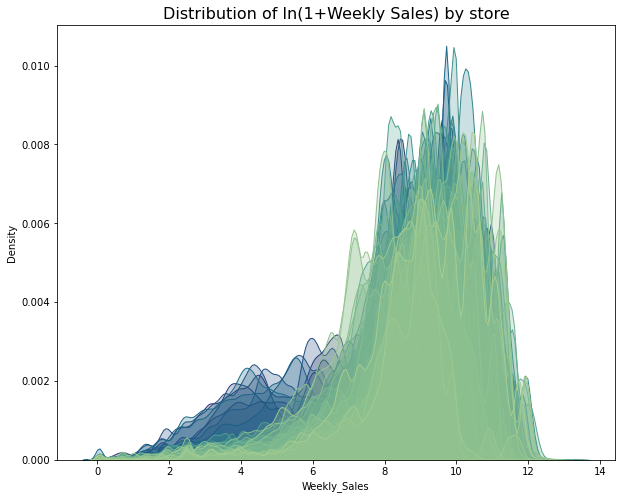

In [13]:
# Plotting log weekly departmental sales by store distributions
f, axs = plt.subplots(figsize=(10, 8))
sns.kdeplot(np.log1p(data['Weekly_Sales']),
            hue=data['Store'],
            palette='crest',
            fill=True, bw_adjust=.3, ax=axs)
plt.title('Distribution of ln(1+Weekly Sales) by store', size=16)
plt.legend([],[], frameon=False)
plt.show()

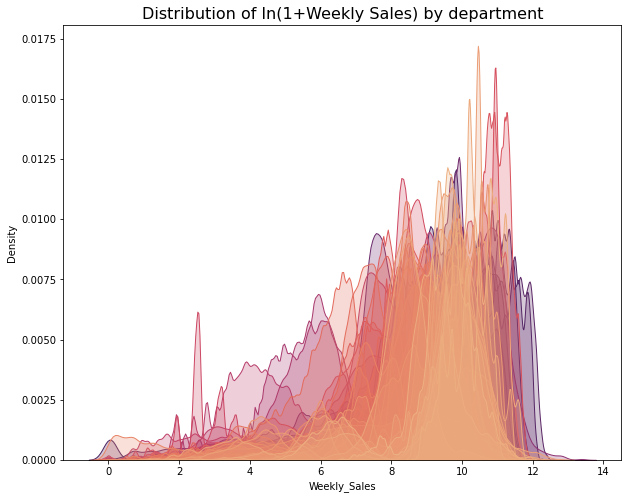

In [14]:
# Plotting log weekly departmental sales by store distributions
f, axs = plt.subplots(figsize=(10, 8))
sns.kdeplot(np.log1p(data['Weekly_Sales']),
            hue=data['Dept'],
            palette='flare',
            fill=True, bw_adjust=.3, ax=axs)
plt.title('Distribution of ln(1+Weekly Sales) by department', size=16)
plt.legend([],[], frameon=False)
plt.show()

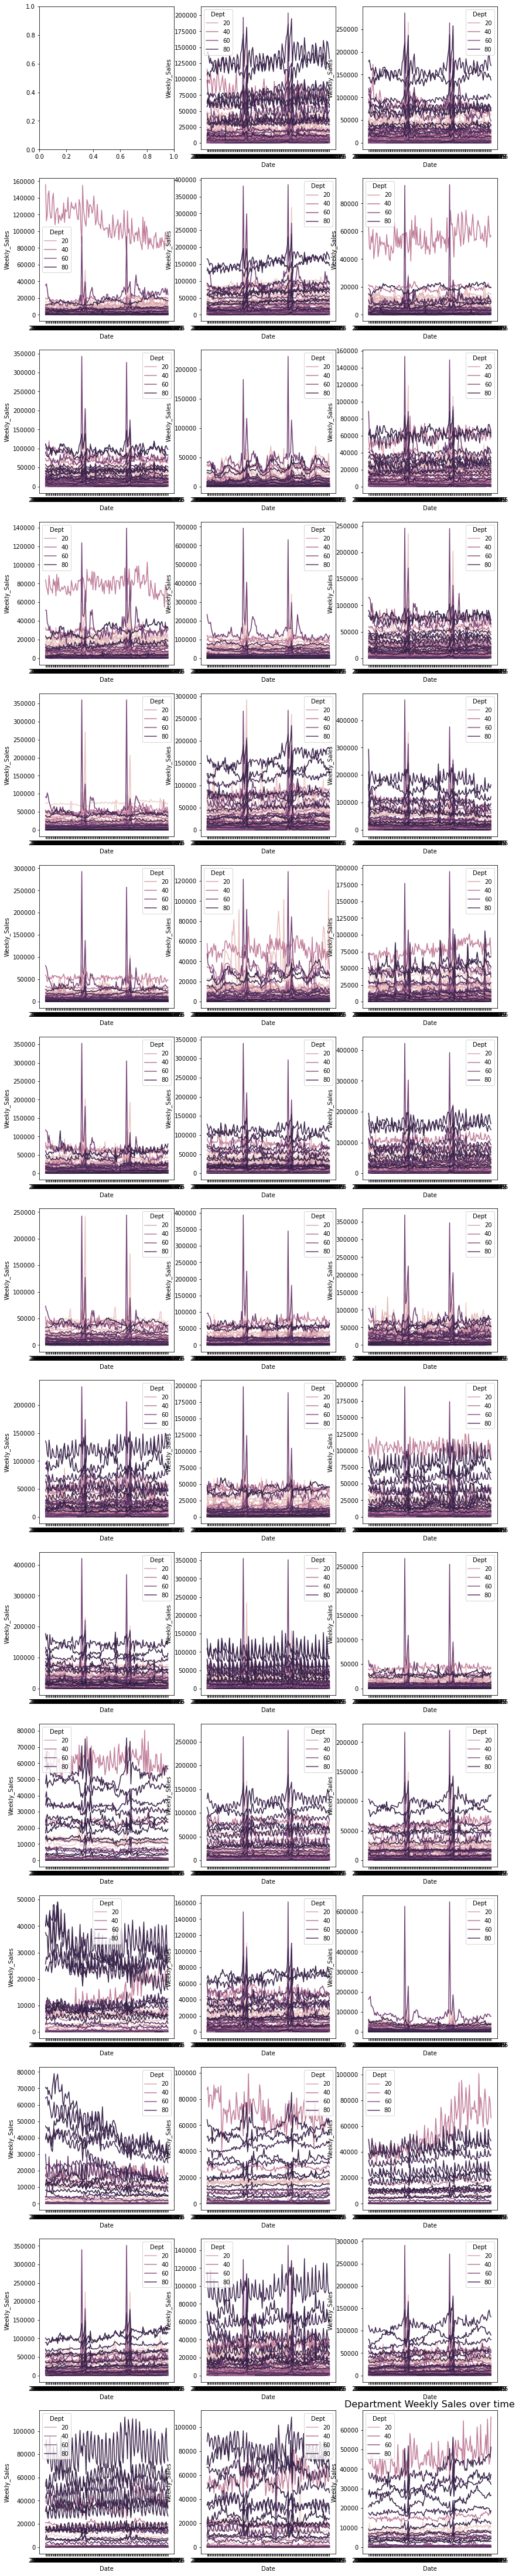

In [15]:
# Plotting total weekly sales by store time series
fig, axs = plt.subplots(15,3)
fig.set_size_inches(14, 80)
store_data = data.groupby([])
for i in range(45):
    store_data = data[data['Store']==i]
    sns.lineplot(data=store_data,
                 y='Weekly_Sales',
                 x='Date',
                 hue='Dept',
                 ax=axs[i//3,i%3])
plt.title('Department Weekly Sales over time', size=16)
#plt.legend([],[], frameon=False)    
plt.show()

#### **NOTES FROM (3.4):**

* No missing values for `Weekly_Sales`
* Distribution of house prices is significantly skewed

#### **OBSERVATIONS:**
* `Weekly_Sales` data should be log-transformed to reduce skew (benefits regression models)
* After fitting a model with log-tranformed `Weekly_Sales` predictions should be inversely transformed


Plots:
Time series (weekly sales vs time, target variable analysis)
- each department for each store (all together)


### 3.5 - Total Sales by Store distribution

### 3.5 - Total Sales by Store series with flags

### 3.5 - Total Sales by Store

### 3.5 - Total Sales by Store

## 4 - Data cleaning and preprocessing

## 5 - Modelling

- define metric
- ARIMA
- expo smoothing\
- prophet

## 6 - Final predictions and submission